# MNIST-Handwritten-Digit-Recognition-using-CNN
## Convolutional Neural Network
CNN is a type of deep learning model for processing data that has a grid pattern, such as images, which is inspired by the organization of animal visual cortex and designed to automatically and adaptively learn spatial hierarchies of features, from low- to high-level patterns. CNN is a mathematical construct that is typically composed of three types of layers (or building blocks): convolution, pooling, and fully connected layers. The first two, convolution and pooling layers, perform feature extraction, whereas the third, a fully connected layer, maps the extracted features into final output, such as classification.

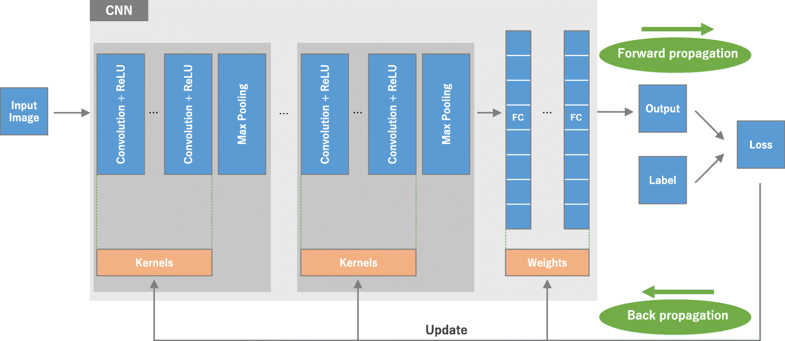

In fig. an overview of a convolutional neural network (CNN) architecture and the training process. A CNN is composed of a stacking of several building blocks: convolution layers, pooling layers (e.g., max pooling), and fully connected (FC) layers. A model’s performance under particular kernels and weights is calculated with a loss function through forward propagation on a training dataset, and learnable parameters, i.e., kernels and weights, are updated according to the loss value through backpropagation with gradient descent optimization algorithm. ReLU, rectified linear unit

A computer sees an image as an array of numbers. The matrix on the right contains numbers between 0 and 255, each of which corresponds to the pixel brightness in the left image. Both are overlaid in the middle image.

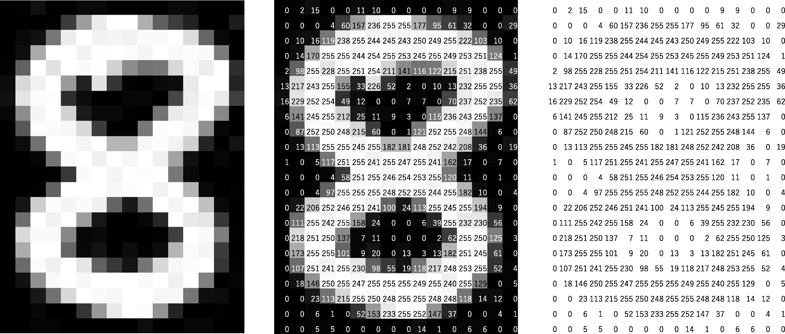

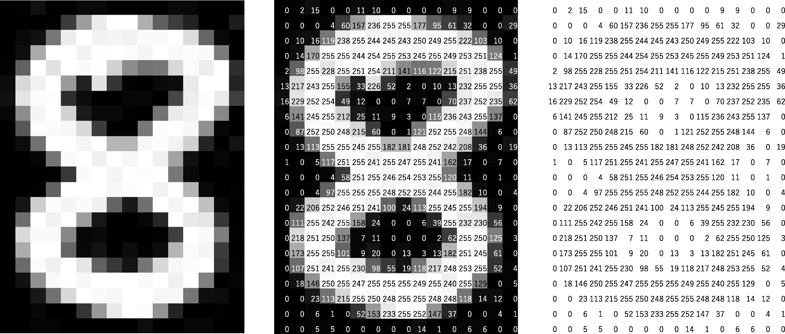

## Convolution
Convolution is a specialized type of linear operation used for feature extraction, where a small array of numbers, called a kernel, is applied across the input, which is an array of numbers, called a tensor. An element-wise product between each element of the kernel and the input tensor is calculated at each location of the tensor and summed to obtain the output value in the corresponding position of the output tensor, called a feature map (Fig. 3a–c). This procedure is repeated applying multiple kernels to form an arbitrary number of feature maps, which represent different characteristics of the input tensors; different kernels can, thus, be considered as different feature extractors (Fig. 3d). Two key hyperparameters that define the convolution operation are size and number of kernels. The former is typically 3 × 3, but sometimes 5 × 5 or 7 × 7. The latter is arbitrary, and determines the depth of output feature maps.

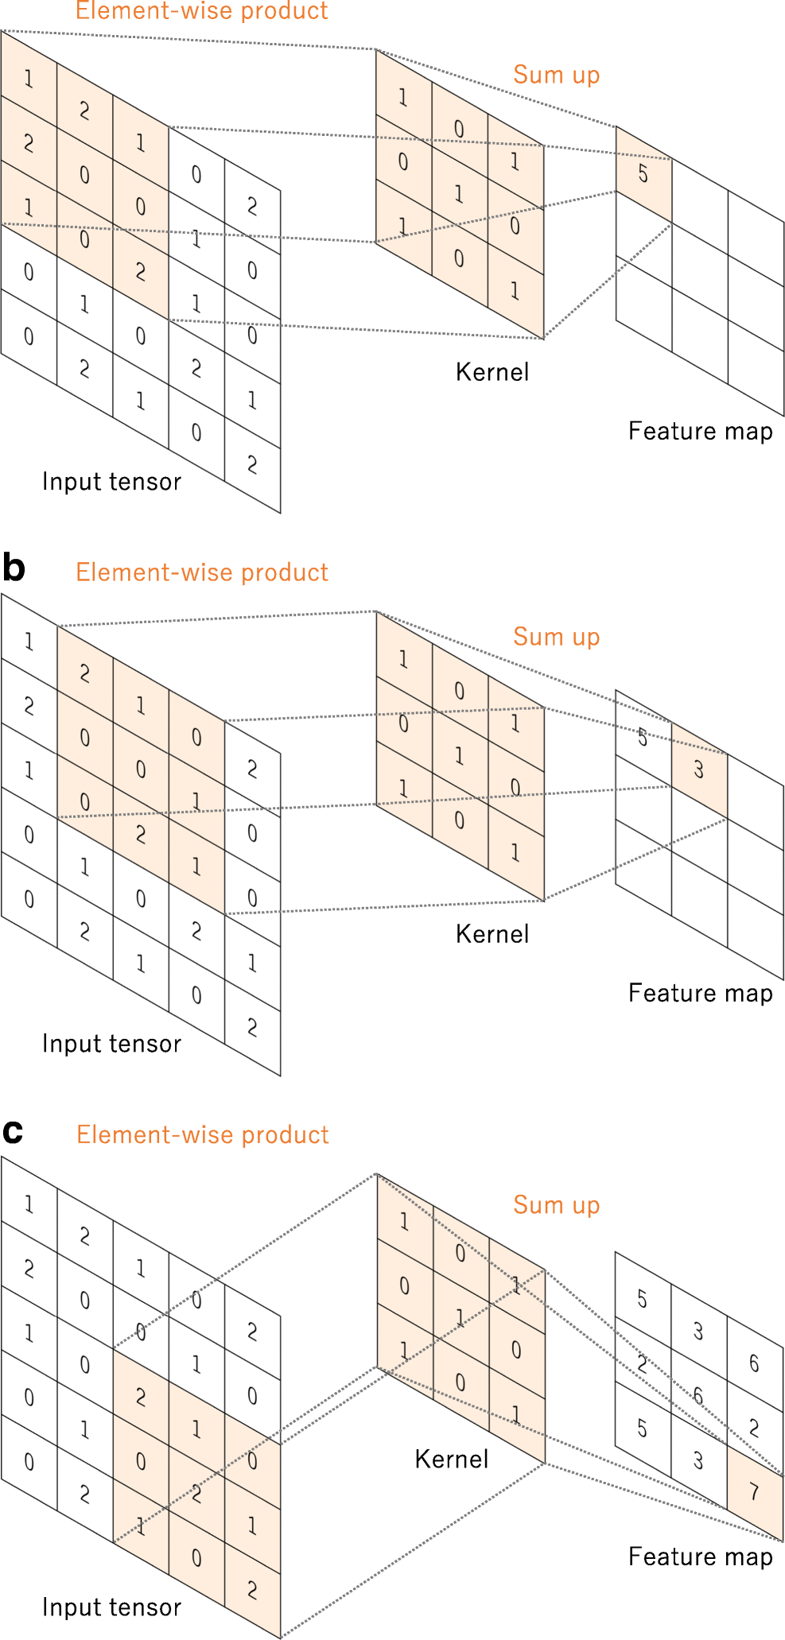

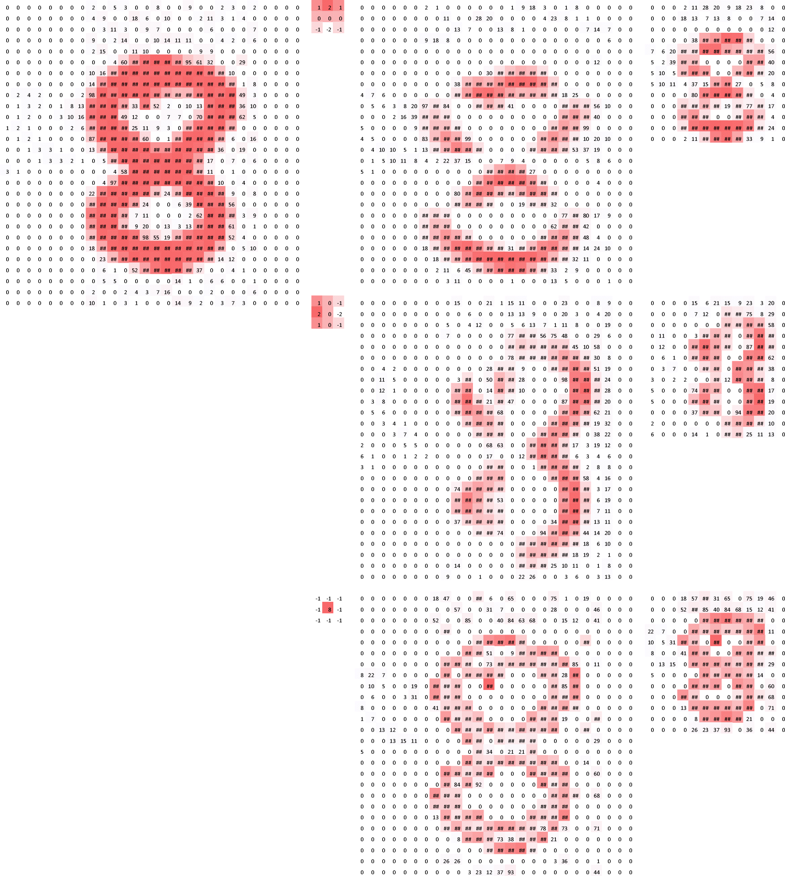

An example of convolution operation with a kernel size of 3 × 3, no padding, and a stride of 1. A kernel is applied across the input tensor, and an element-wise product between each element of the kernel and the input tensor is calculated at each location and summed to obtain the output value in the corresponding position of the output tensor, called a feature map. d Examples of how kernels in convolution layers extract features from an input tensor are shown. Multiple kernels work as different feature extractors, such as a horizontal edge detector (top), a vertical edge detector (middle), and an outline detector (bottom). Note that the left image is an input, those in the middle are kernels, and those in the right are output feature maps.

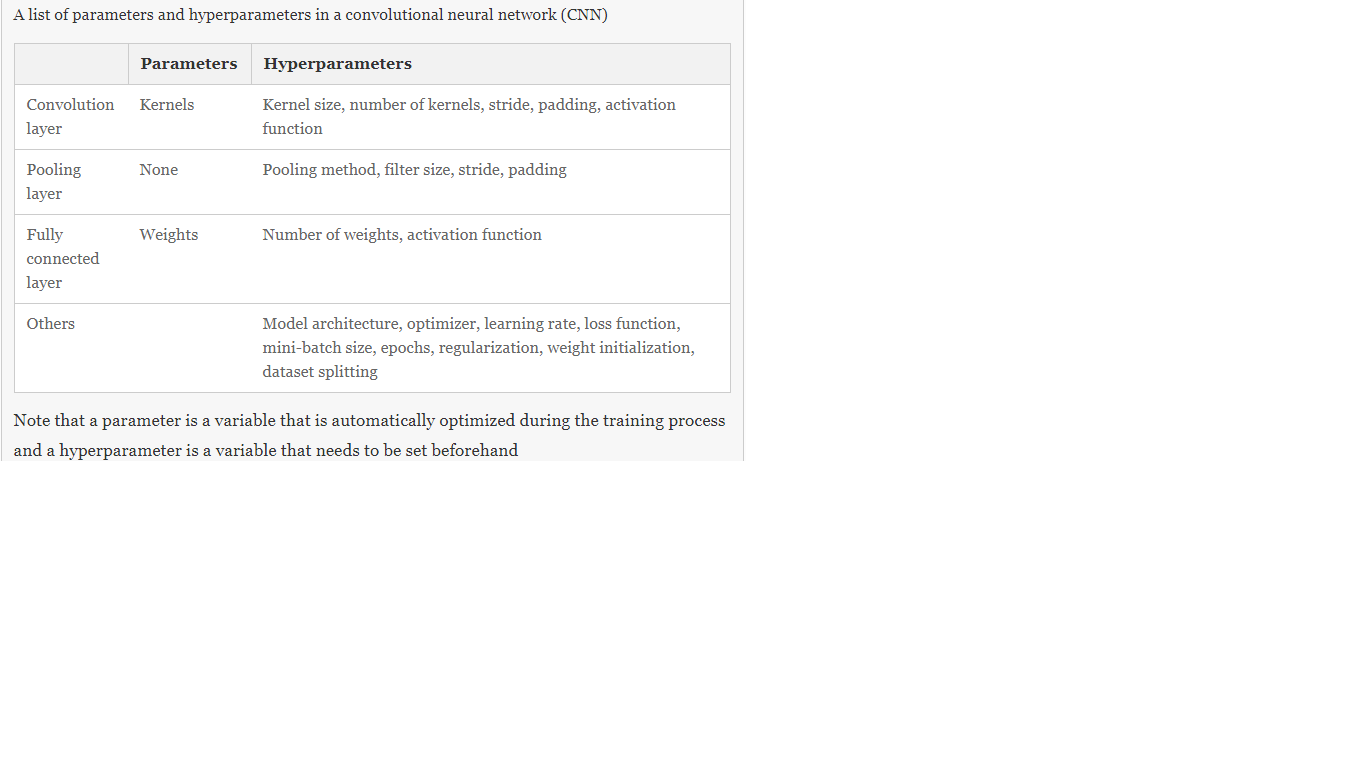

## Pooling layer
A pooling layer provides a typical downsampling operation which reduces the in-plane dimensionality of the feature maps in order to introduce a translation invariance to small shifts and distortions, and decrease the number of subsequent learnable parameters. It is of note that there is no learnable parameter in any of the pooling layers, whereas filter size, stride, and padding are hyperparameters in pooling operations, similar to convolution operations.

## Max pooling
The most popular form of pooling operation is max pooling, which extracts patches from the input feature maps, outputs the maximum value in each patch, and discards all the other values. A max pooling with a filter of size 2 × 2 with a stride of 2 is commonly used in practice. This downsamples the in-plane dimension of feature maps by a factor of 2. Unlike height and width, the depth dimension of feature maps remains unchanged.

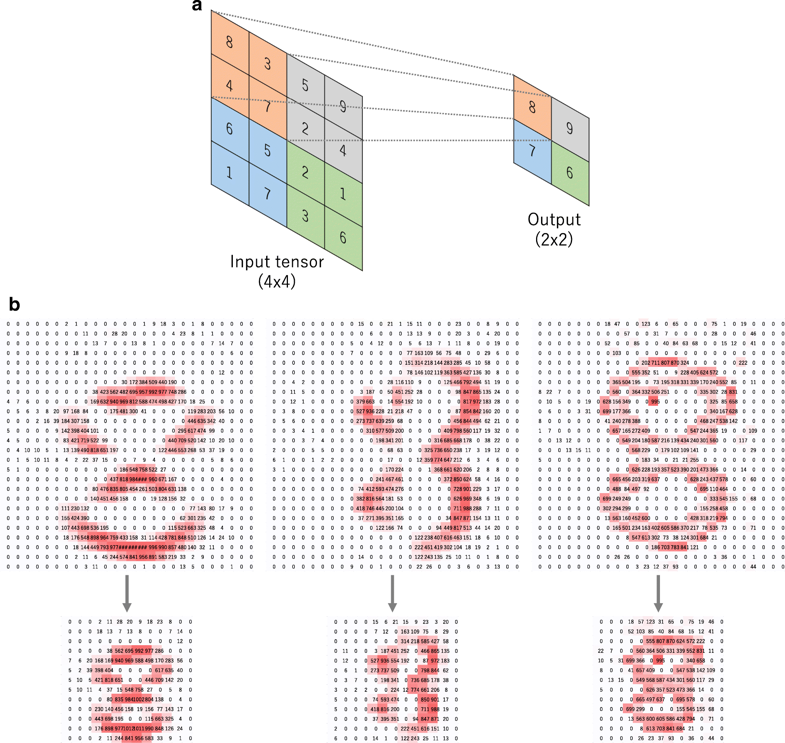

## Fully connected layer
The output feature maps of the final convolution or pooling layer is typically flattened, i.e., transformed into a one-dimensional (1D) array of numbers (or vector), and connected to one or more fully connected layers, also known as dense layers, in which every input is connected to every output by a learnable weight. Once the features extracted by the convolution layers and downsampled by the pooling layers are created, they are mapped by a subset of fully connected layers to the final outputs of the network, such as the probabilities for each class in classification tasks. The final fully connected layer typically has the same number of output nodes as the number of classes. Each fully connected layer is followed by a nonlinear function, such as ReLU.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,"x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [ ]:
np.random.seed(0)

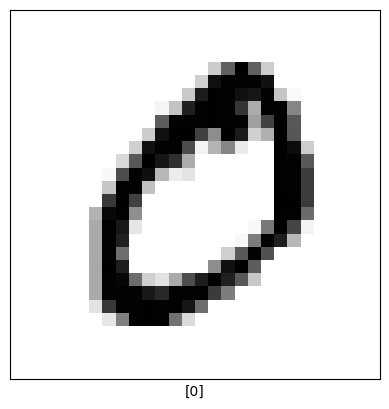

In [ ]:
# Show one of the images from the training dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[1]])
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [ ]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [ ]:
x_train = x_train.reshape(-1,28, 28,1)#Reshape for CNN
x_test = x_test.reshape(-1,28, 28, 1)


In [ ]:
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)


Epoch 1/10
700/700 [==============================] - 57s 80ms/step - loss: 0.3889 - accuracy: 0.8758 - val_loss: 0.1086 - val_accuracy: 0.9677
Epoch 2/10
700/700 [==============================] - 54s 77ms/step - loss: 0.1492 - accuracy: 0.9527 - val_loss: 0.0773 - val_accuracy: 0.9758
Epoch 3/10
700/700 [==============================] - 53s 76ms/step - loss: 0.1134 - accuracy: 0.9649 - val_loss: 0.0618 - val_accuracy: 0.9806
Epoch 4/10
700/700 [==============================] - 53s 76ms/step - loss: 0.0908 - accuracy: 0.9715 - val_loss: 0.0547 - val_accuracy: 0.9834
Epoch 5/10
700/700 [==============================] - 53s 76ms/step - loss: 0.0806 - accuracy: 0.9740 - val_loss: 0.0514 - val_accuracy: 0.9846
Epoch 6/10
700/700 [==============================] - 54s 78ms/step - loss: 0.0707 - accuracy: 0.9771 - val_loss: 0.0407 - val_accuracy: 0.9887
Epoch 7/10
700/700 [==============================] - 53s 75ms/step - loss: 0.0657 - accuracy: 0.9795 - val_loss: 0.0411 - val_accuracy:

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9898999929428101


In [ ]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 3s 9ms/step


array([8.6371833e-11, 3.5523986e-09, 2.0741966e-08, 3.0571523e-06,
       5.9188883e-11, 6.6639055e-11, 3.1837978e-16, 9.9999040e-01,
       1.9877993e-09, 6.4414621e-06], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
x_test = x_test.reshape(-1,28, 28)
x_test.shape

(10000, 28, 28)

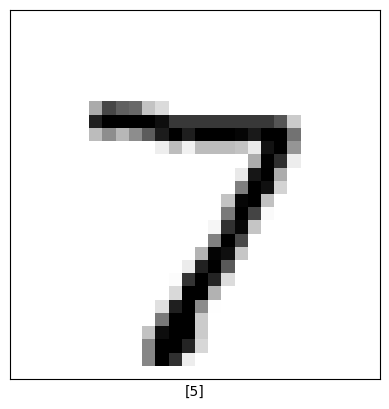

In [ ]:
# Show one of the images from the test dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)


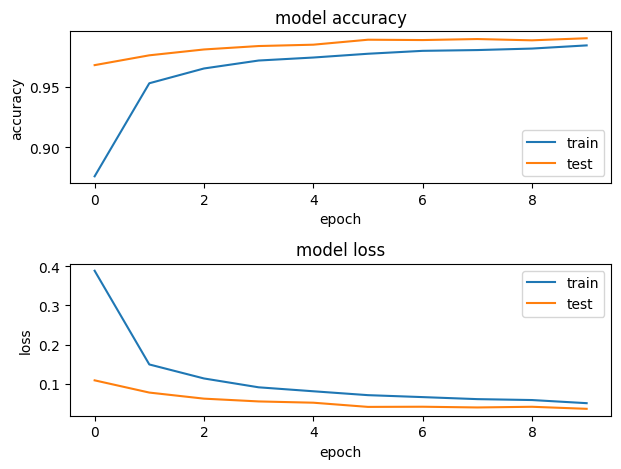

In [ ]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()



In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

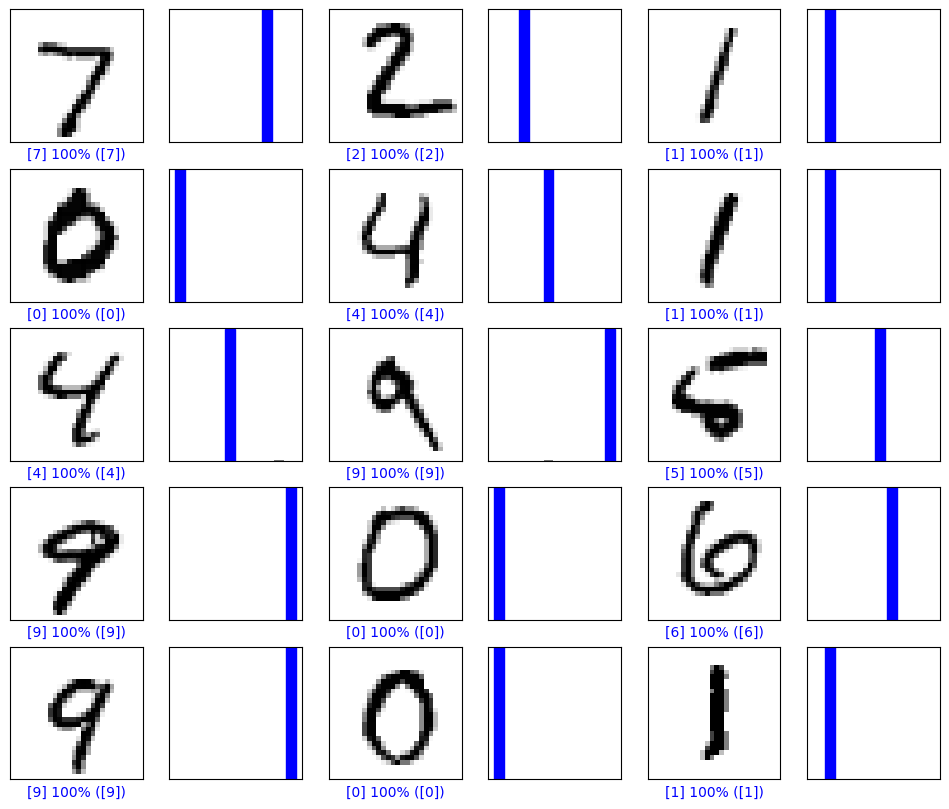

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()